In [1]:
import src
import src.features as lf
import src.models as lm
import src.visualization as lv
from src.models.models import *



lm.models.RECORD_DIR='../models/records'

ModuleNotFoundError: No module named 'src'


Data loading
---------

In [2]:
#### Data building
data = lf.data_builder.create_dataset_from_directory('../data/v2-plant-seedlings-dataset/')


Model Loading
---------

In [7]:

#### Train Campaigns
campaign_id='test'

#### Stage 1
stage1_resnet = Stage1ResNetv2(data)
stage1_resnet.fit_or_load(campaign_id, training=False)


stage1_mobilenet = Stage1MobileNetv3(data)
stage1_mobilenet.fit_or_load(campaign_id, training=False)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-1_ResNetv2 –– Loading
Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-1_MobileNetv3 –– Loading


Model evaluation
-------

In [4]:
img = data.dataframe.iloc[8]
print(f"Pred : {stage1_mobilenet.single_prediction(img.path)}")
print(f"Actual : {img.label}")

>>> Stage-1_MobileNetv3 –– Evaluation
1/1 [==============================] - 0s 366ms/step
Pred : Cleavers
Actual : Cleavers


In [14]:
results = stage1_mobilenet.evaluate()
display(results)

>>> Stage-1_MobileNetv3 –– Evaluation
18/18 [==============================] - 7s 331ms/step


,filename,actual,predicted,Same
0,../data/v2-plant-seedlings-dataset/Shepherd’s ...,Shepherd’s Purse,Small-flowered Cranesbill,False
1,../data/v2-plant-seedlings-dataset/Charlock/21...,Charlock,Small-flowered Cranesbill,False
2,../data/v2-plant-seedlings-dataset/Sugar beet/...,Sugar beet,Sugar beet,True
3,../data/v2-plant-seedlings-dataset/Scentless M...,Scentless Mayweed,Scentless Mayweed,True
4,../data/v2-plant-seedlings-dataset/Cleavers/10...,Cleavers,Cleavers,True
...,...,...,...,...
549,../data/v2-plant-seedlings-dataset/Scentless M...,Scentless Mayweed,Scentless Mayweed,True
550,../data/v2-plant-seedlings-dataset/Small-flowe...,Small-flowered Cranesbill,Small-flowered Cranesbill,True
551,../data/v2-plant-seedlings-dataset/Scentless M...,Scentless Mayweed,Common Chickweed,False
552,../data/v2-plant-seedlings-dataset/Loose Silky...,Loose Silky-bent,Black-grass,False


>>> Stage-1_MobileNetv3 –– Display training data samples


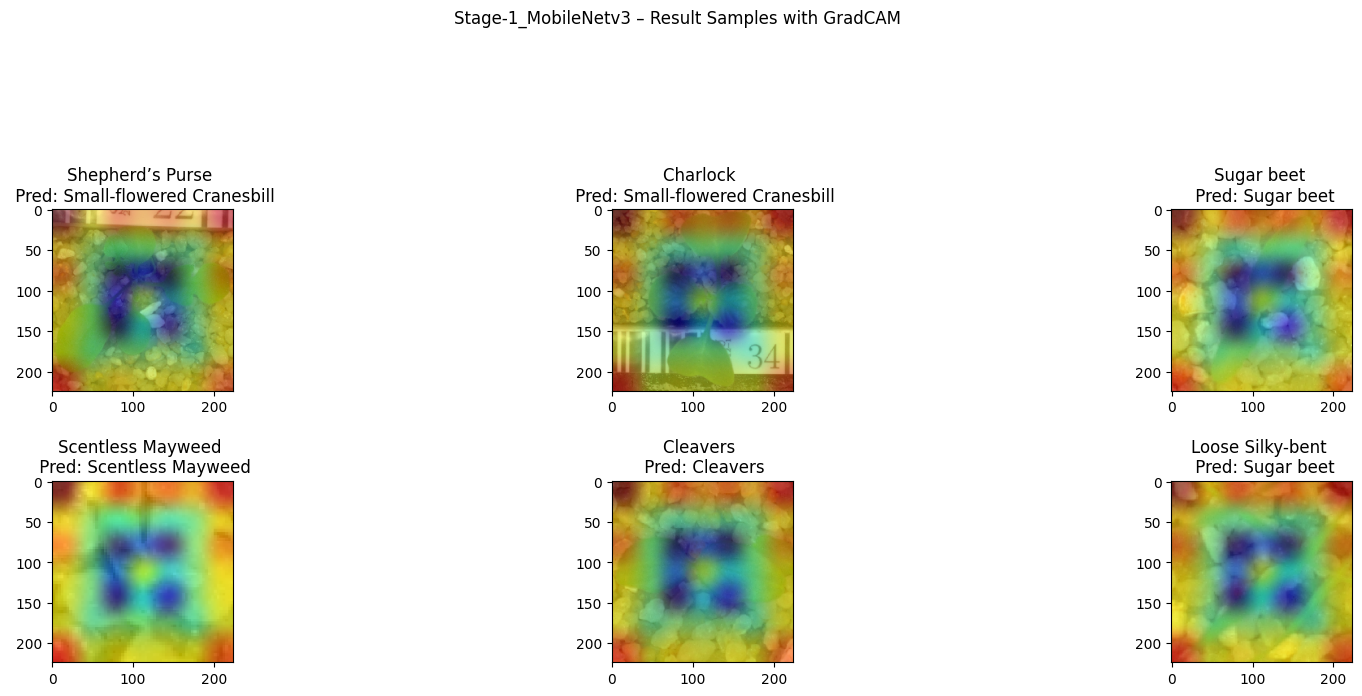

In [6]:
stage1_mobilenet.display_samples(nb=6, gradcam=True)

>>> Stage-1_ResNetv2 –– Evaluation
18/18 [==============================] - 24s 1s/step
>>> Stage-1_ResNetv2 –– Display training data samples


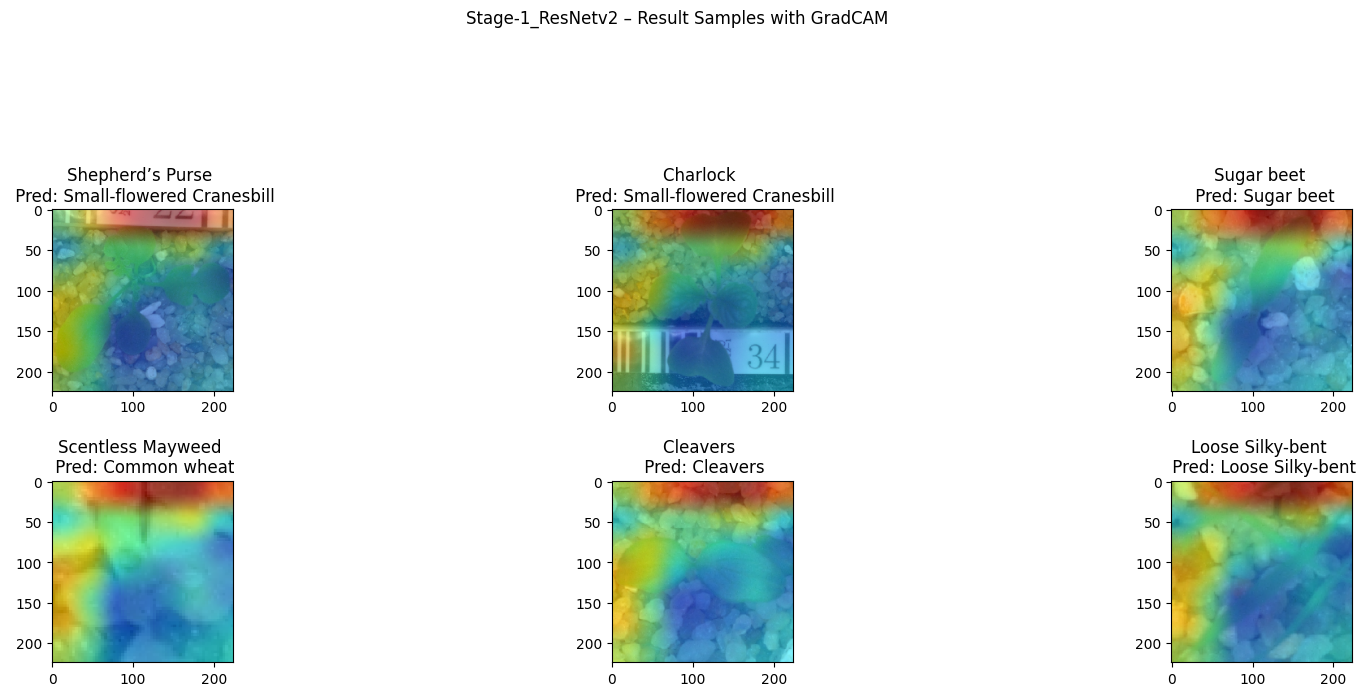

In [8]:
stage1_resnet.evaluate()
stage1_resnet.display_samples(nb=6, gradcam=True)

In [12]:
stage1_resnet.print_classification_report();

>>> Stage-1_ResNetv2 –– Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.36      0.68      0.47        31
                 Charlock       1.00      0.67      0.80        49
                 Cleavers       0.93      0.74      0.82        38
         Common Chickweed       0.78      0.66      0.72        77
             Common wheat       0.79      0.58      0.67        19
                  Fat Hen       0.56      0.70      0.62        46
         Loose Silky-bent       0.84      0.59      0.69        80
                    Maize       0.83      0.74      0.78        27
        Scentless Mayweed       0.62      0.62      0.62        53
         Shepherd’s Purse       0.40      0.08      0.13        25
Small-flowered Cranesbill       0.51      0.96      0.67        55
               Sugar beet       0.87      0.87      0.87        54

                 accuracy                           0.68       554
              

In [15]:
stage1_mobilenet.print_classification_report();

>>> Stage-1_MobileNetv3 –– Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.35      0.58      0.44        31
                 Charlock       0.73      0.78      0.75        49
                 Cleavers       0.89      0.42      0.57        38
         Common Chickweed       0.65      0.81      0.72        77
             Common wheat       0.14      0.21      0.17        19
                  Fat Hen       0.71      0.37      0.49        46
         Loose Silky-bent       0.74      0.42      0.54        80
                    Maize       0.49      0.70      0.58        27
        Scentless Mayweed       0.53      0.34      0.41        53
         Shepherd’s Purse       0.50      0.04      0.07        25
Small-flowered Cranesbill       0.66      0.80      0.72        55
               Sugar beet       0.48      0.87      0.62        54

                 accuracy                           0.57       554
           

In [19]:
stage1_mobilenet.single_prediction(data.dataframe.iloc[8].path)


>>> Stage-1_MobileNetv3 –– Evaluation
1/1 [==============================] - 0s 392ms/step


'Cleavers'

In [20]:
stage1_resnet.single_prediction(data.dataframe.iloc[8].path)

>>> Stage-1_ResNetv2 –– Evaluation
1/1 [==============================] - 1s 539ms/step


'Cleavers'